I was trying to make unittests to task target_en (6th week). And the start point was 0.33/1.00 and start code I attached below.

In [ ]:
"""
Target name in English
"""
import random


def generate_grid() -> list[list[str]]:
    """
    Generates list of lists of letters - i.e. grid for the game.
    e.g. [['I', 'G', 'E'], ['P', 'I', 'S'], ['W', 'M', 'G']]
    """
    vowels = 'AEIOU'
    consonants = 'BCDFGHJKLMNPQRSTVWXYZ'
    random_letters = []
    output = []
    for i in range(6):
        random_letters.append(random.choice(consonants))

    for i in range(3):
        random_letters.append(random.choice(vowels))
    for i in range(3):
        lst = []
        for j in range(3):
            lst.append(random_letters[i*3 + j])
        output.append(lst)
    return output


def get_words(f: str, letters: list[str]) -> list[str]:
    """
    Reads the file f. Checks the words with rules and returns a list of words.
    """
    if isinstance(f, str) and isinstance(letters, list):
        central = letters[4]

        with open (f, "r", encoding = "utf-8") as file:
            lines = file.readlines()

        letters_lower = ""
        for letter in letters:
            letters_lower += letter.lower()

        all_possible_words = []
        for word in lines:
            word = word.strip()
            checked = letters_lower
            if (4 <= len(word) <= 9) and (central in word):
                is_possible_word = True
                for letter in word:
                    if letter in checked:
                        checked = checked.replace(letter, "")
                    else:
                        is_possible_word = False
                        break
                if is_possible_word:
                    all_possible_words.append(word)
        return all_possible_words
def get_user_words() -> list[str]:
    """
    Gets words from user input and returns a list with these words.
    Usage: enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter 
    for Windows.
    Note: the user presses the enter key after entering each word.
    """
    lst = []
    while True:
        try:
            word = input()
            if word == '':
                break
            lst.append(word)
        except EOFError:
            break
    return lst
def get_pure_user_words(user_words: list[str], letters: list[str],\
words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    """
    wrong_words = []

    for word in user_words:
        if word not in words_from_dict:
            wrong_words.append(word)

    return wrong_words
def main():
    """
    Body of the function
    """
    grid = generate_grid()
    print("Game grid is: ")
    for item in grid:
        row = ''
        for letter in item:
            row += letter + ' '
        print(row)
    print("Enter a word or press ctrl+d to finish for *nix or Ctrl-Z+Enter for Windows.")

    letters = []
    for item in grid:
        for letter in item:
            letters.append(letter.lower())

    user_words = get_user_words()
    all_words = get_words("en.txt", letters)

    missed_words = []
    wrong_words = get_pure_user_words(user_words, letters, all_words)

    for word in all_words:
        if word not in user_words:
            missed_words.append(word)

    print("Number of the right words:", len(user_words) - len(wrong_words))

    print("All possible words:")
    print(all_words)

    print("You missed the following words:")
    print(missed_words)

    print("You suggest, but we don`t have them in dictionary:")
    print(wrong_words)


My first requests consists of condition of the problem, code and ask for unittests to find critical points. And the response was unittests below.

In [ ]:
import unittest
from target_game import generate_grid, get_words, get_user_words, get_pure_user_words

class TestTargetGame(unittest.TestCase):
    def test_generate_grid(self):
        # Test whether the generated grid has correct dimensions
        grid = generate_grid()
        self.assertEqual(len(grid), 3)
        self.assertEqual(len(grid[0]), 3)

        # Test whether the generated grid contains only letters
        for row in grid:
            for letter in row:
                self.assertTrue(letter.isalpha())

    def test_get_words(self):
        # Test whether get_words returns a list of strings
        words = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        self.assertIsInstance(words, list)
        for word in words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

    def test_get_user_words(self):
        # Test whether get_user_words returns a list of strings
        user_input = ['word1', 'word2', 'word3']
        with unittest.mock.patch('builtins.input', side_effect=user_input):
            words = get_user_words()
        self.assertIsInstance(words, list)
        for word in words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

    def test_get_pure_user_words(self):
        # Test whether get_pure_user_words returns a list of strings
        user_words = ['word1', 'word2', 'word3']
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        words_from_dict = ['word2', 'word3']
        wrong_words = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertIsInstance(wrong_words, list)
        for word in wrong_words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

if __name__ == '__main__':
    unittest.main()


But the error occured and I provide it to ChatGPT.

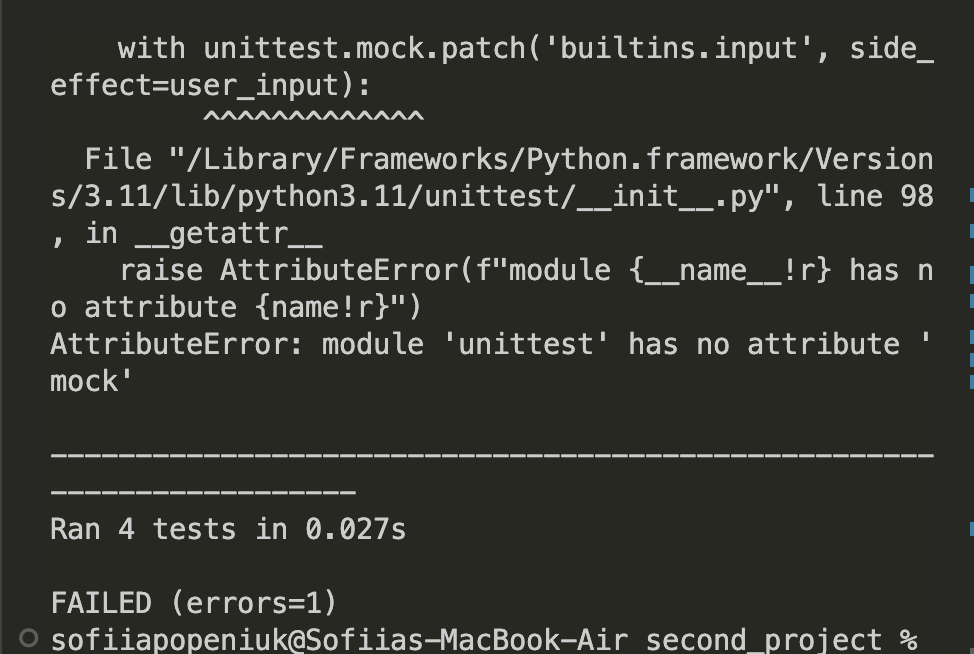

The answer was pretty simple to add this line of code

```from unittest import mock```

But one more error occured.

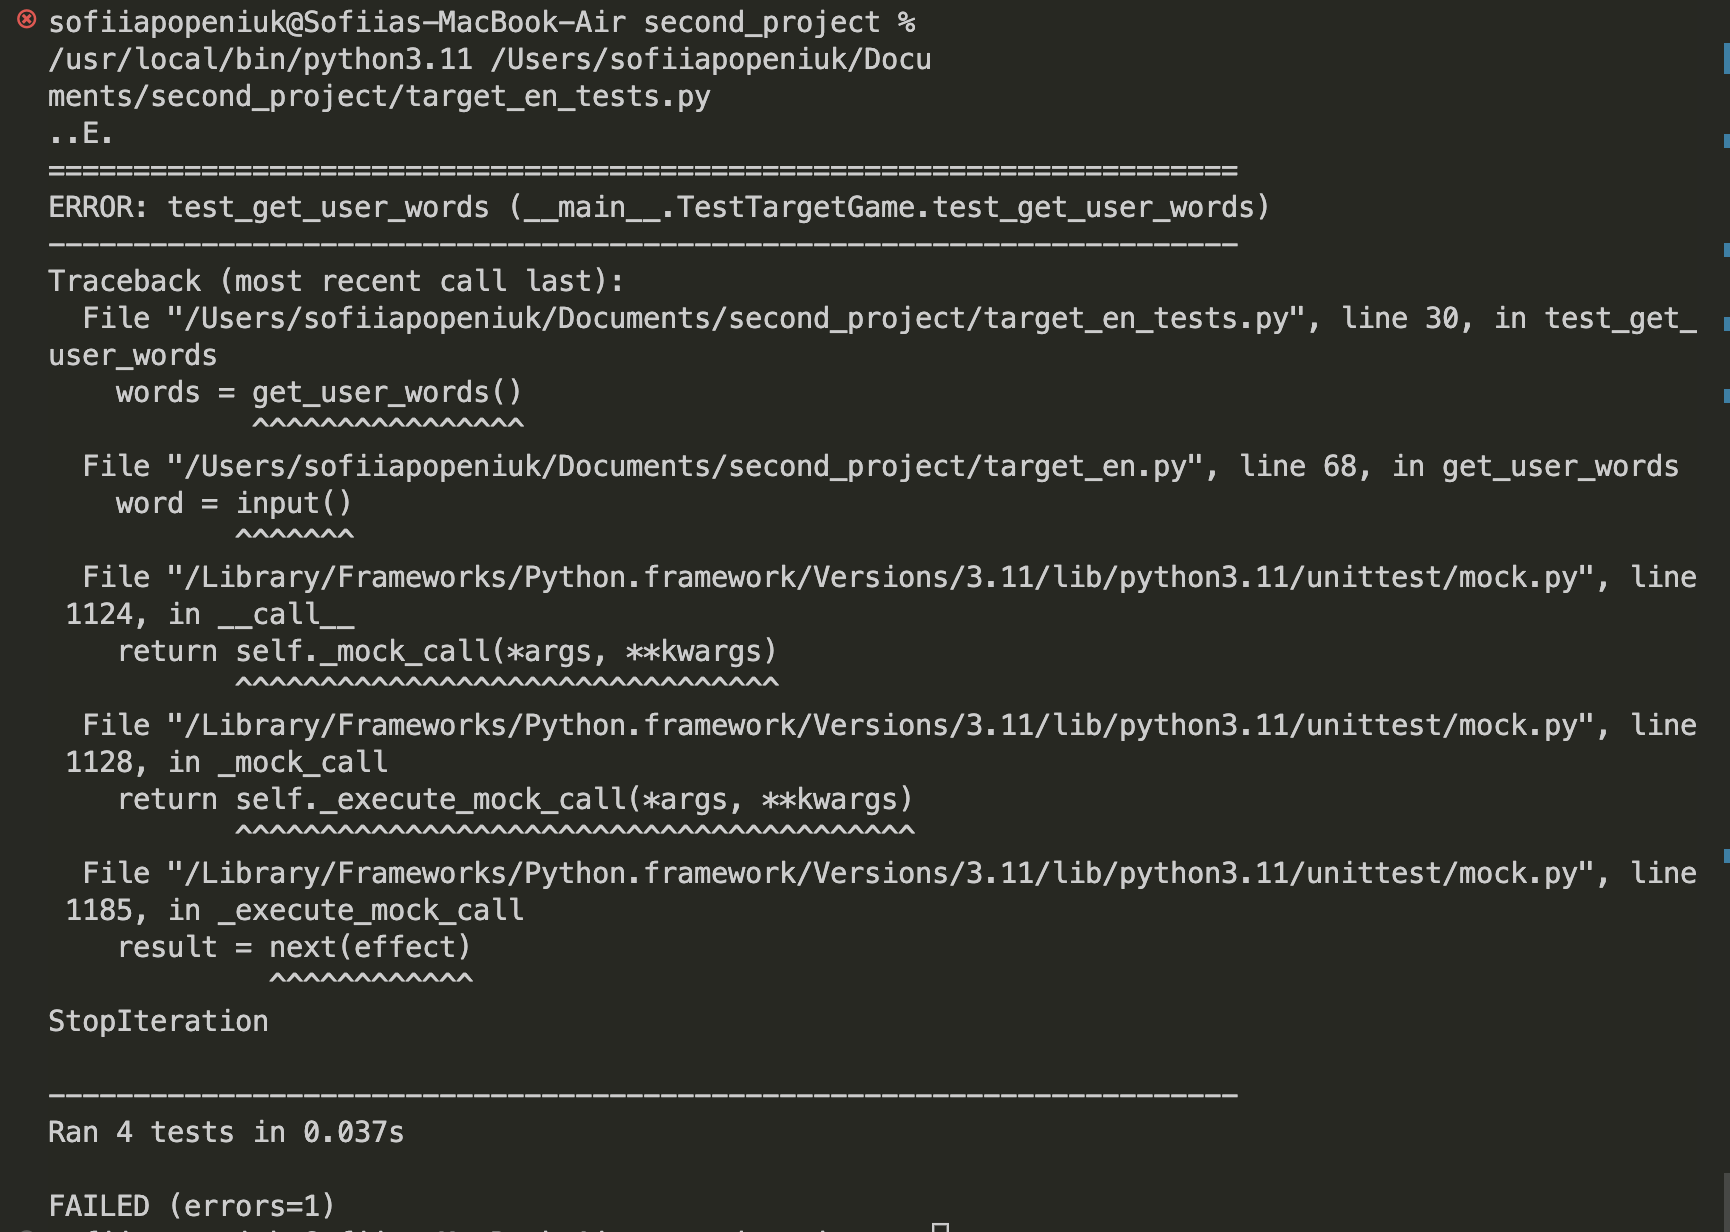

But as neither me nor ChatGPT doesn't know how to solve it, I comment this part of testing as the condition tells that there is should be input construction.

After this all tests passed.

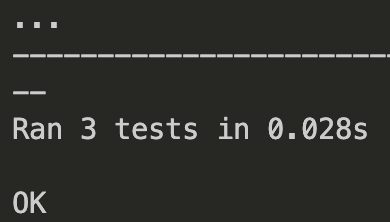

So I write "can you help me correct this code". And it gives me next tests

In [ ]:
import unittest
from unittest.mock import patch
from target_en import generate_grid, get_words, get_user_words, get_pure_user_words

class TestTargetGame(unittest.TestCase):
    def test_generate_grid(self):
        grid = generate_grid()
        self.assertEqual(len(grid), 3)
        self.assertEqual(len(grid[0]), 3)
        for row in grid:
            for letter in row:
                self.assertTrue(letter.isalpha())

    def test_get_words(self):
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        words = get_words("en.txt", letters)
        self.assertIsInstance(words, list)
        for word in words:
            self.assertIsInstance(word, str)

    def test_get_pure_user_words(self):
        user_words = ['word1', 'word2', 'word3']
        words_from_dict = ['word2', 'word3']
        wrong_words = get_pure_user_words(user_words, words_from_dict)
        self.assertIsInstance(wrong_words, list)
        for word in wrong_words:
            self.assertIsInstance(word, str)

if __name__ == '__main__':
    unittest.main()


And another error occured.

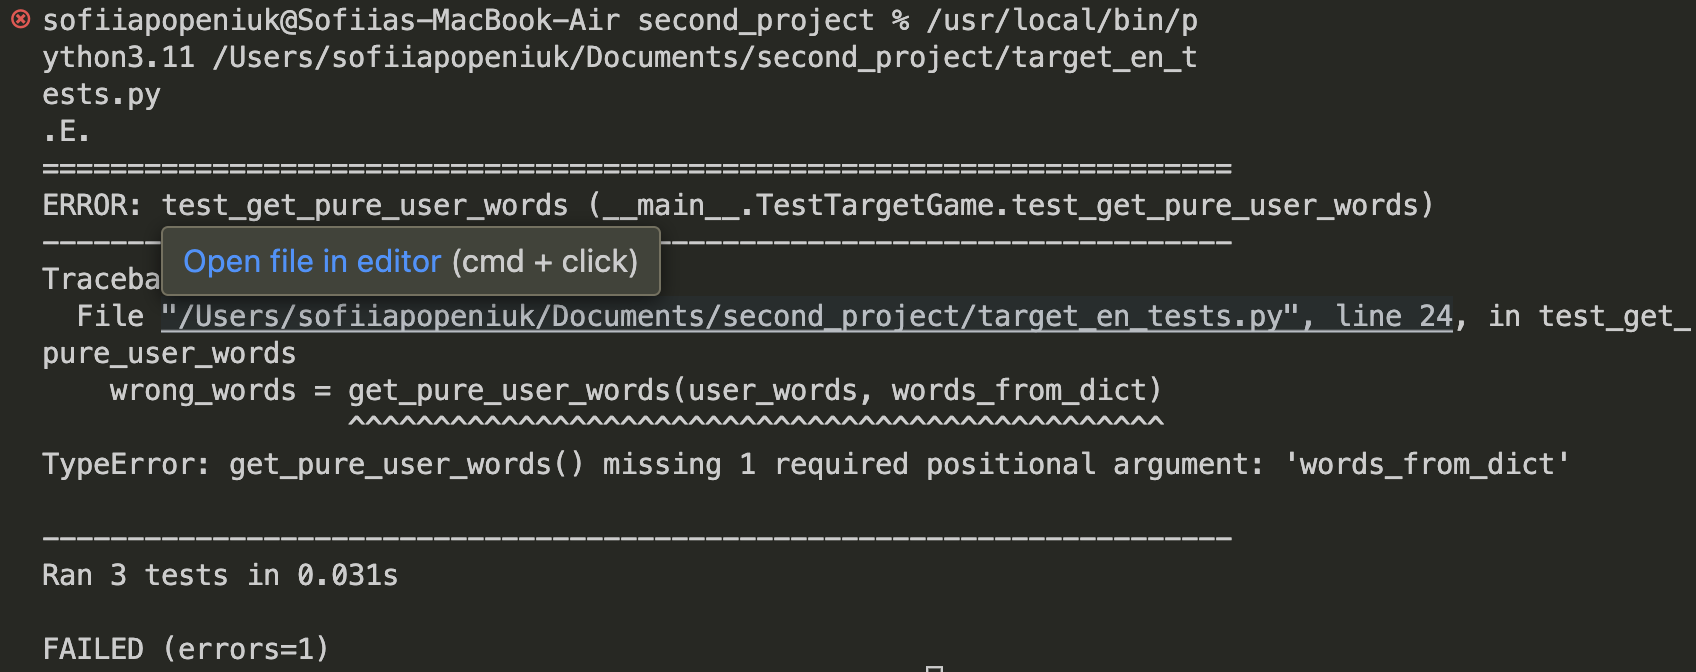

I ask ChatGPT to correct it and it provides me this function.

In [ ]:
def test_get_pure_user_words(self):
    user_words = ['word1', 'word2', 'word3']
    words_from_dict = ['word2', 'word3']
    letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']  # Example letters
    wrong_words = get_pure_user_words(user_words, letters, words_from_dict)
    self.assertIsInstance(wrong_words, list)
    for word in wrong_words:
        self.assertIsInstance(word, str)


And again all tests passed

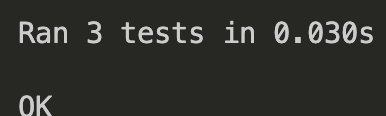

So i ask what coverage that unittests have but it gives me instruction for installing coverage library. I ask for its analythics and it answer in this way.

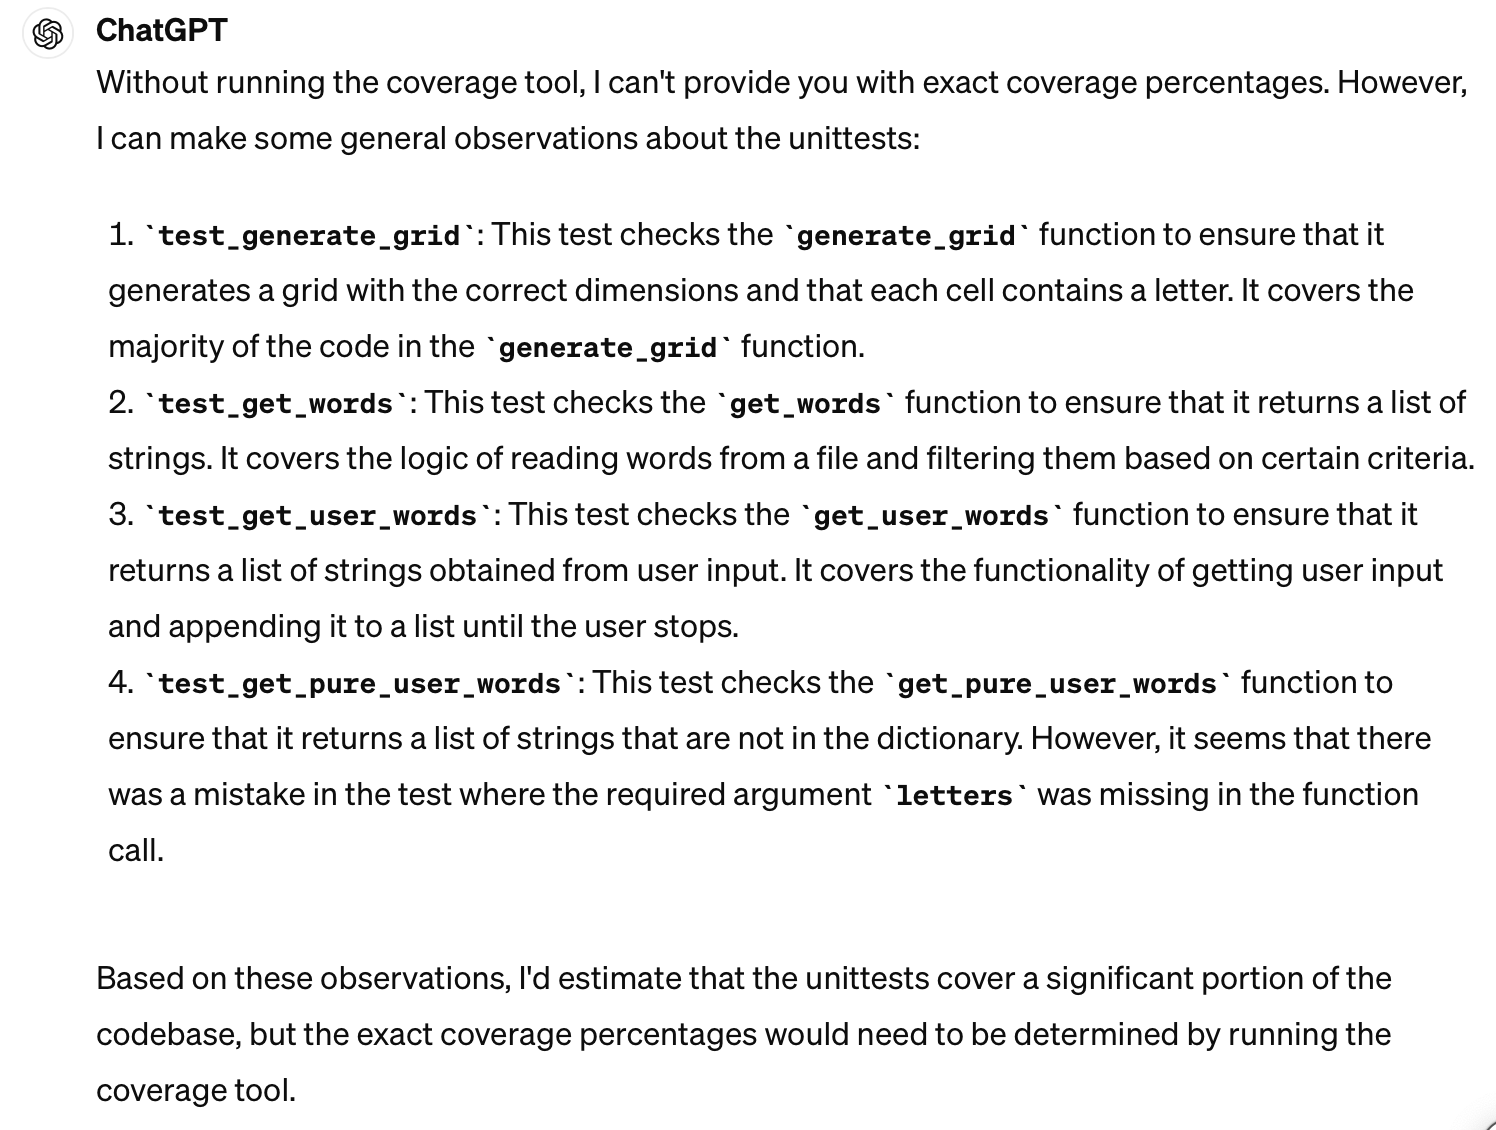

I check it by coverage library and the number was 66%. But if I delete function get_user_words (because I comment tests on it as it doesn't work) the number became 72% and without function maijn() 99%.

I combine two sets of unittests and ask ChatGPT to optimize it. The result was

In [ ]:
import unittest
from unittest.mock import patch
from target_game import generate_grid, get_words, get_user_words, get_pure_user_words

class TestTargetGame(unittest.TestCase):
    def test_generate_grid(self):
        # Test whether the generated grid has correct dimensions
        grid = generate_grid()
        self.assertEqual(len(grid), 3)
        self.assertEqual(len(grid[0]), 3)

        # Test whether the generated grid contains only letters
        for row in grid:
            for letter in row:
                self.assertTrue(letter.isalpha())

    def test_get_words(self):
        # Test whether get_words returns a list of strings
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        words = get_words("en.txt", letters)
        self.assertIsInstance(words, list)
        for word in words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

    def test_get_user_words(self):
        # Test whether get_user_words returns a list of strings
        user_input = ['word1', 'word2', 'word3']
        with patch('builtins.input', side_effect=user_input):
            words = get_user_words()
        self.assertIsInstance(words, list)
        for word in words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

    def test_get_pure_user_words(self):
        # Test whether get_pure_user_words returns a list of strings
        user_words = ['word1', 'word2', 'word3']
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        words_from_dict = ['word2', 'word3']
        wrong_words = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertIsInstance(wrong_words, list)
        for word in wrong_words:
            self.assertIsInstance(word, str)

        # Add more test cases based on expected behavior

if __name__ == '__main__':
    unittest.main()


It is good optimization as the coverage is 99% and optimize it to 3 tests at it was before combining.

Then I ask for some unittests for get_words() function (I also provide this description "Для цього варто розробити завчасно функцію get_words(f, letters), (де f це шлях файлу словника словника ( en.), letters це список літер ігрового поля (e.g. ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])), котра вертала би цей список слів. Слова повинні бути у нижньому регістрі (lowercase), містити центральну літеру, складатися з не менше 4 літер та не повинні повторюватись. Файл en має знаходитися у корені проєкту. Тому для читання достатньо відкривати його за назвою "en.txt". Всередині функції нічого на екран не виводиться.

Прикладом результату виконання такої функції щодо ігрового поля вище могло би бути: ['epopt', 'erupt', 'netop', 'noop', 'nope', 'noup', 'nupe', 'open', 'opportune', 'outpop', 'pent', 'peon', 'pepo', 'pern', 'pert', 'peru', 'perun', 'peto', 'poet', 'pone', 'pont', 'ponto', 'poon', 'poop', 'poor', 'poot', 'pope', 'pore', 'port', 'porteno', 'porto', 'pote', 'poter', 'pour', 'pout', 'pouter', 'prep', 'prone', 'pronto', 'proo', 'prop', 'propone', 'prote', 'proto', 'proton', 'protone', 'prue', 'prune', 'prunt', 'prut', 'puno', 'punt', 'punter', 'punto', 'pure', 'repot', 'repp', 'rope', 'ropp', 'roup', 'roupet', 'tepor', 'terp', 'toop', 'tope', 'topepo', 'toper', 'topo', 'topper', 'toprope', 'toup', 'troop', 'trope', 'troupe', 'turp', 'unpope', 'unpot', 'unprop', 'unrope', 'untop', 'upon', 'uppent', 'upper', 'uproot', 'uptorn']")

In [ ]:
import unittest
from target_game import get_words

class TestGetWords(unittest.TestCase):
    def test_get_words_returns_list(self):
        # Test whether get_words returns a list
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        self.assertIsInstance(result, list)

    def test_get_words_contains_strings(self):
        # Test whether the elements in the result list are strings
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        for word in result:
            self.assertIsInstance(word, str)

    def test_get_words_correct_output(self):
        # Test whether get_words returns the expected output for a known input
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        expected_output = ['epopt', 'erupt', 'netop', 'noop', 'nope', 'noup', 'nupe', 'open', 'opportune', 'outpop', 'pent', 'peon', 'pepo', 'pern', 'pert', 'peru', 'perun', 'peto', 'poet', 'pone', 'pont', 'ponto', 'poon', 'poop', 'poor', 'poot', 'pope', 'pore', 'port', 'porteno', 'porto', 'pote', 'poter', 'pour', 'pout', 'pouter', 'prep', 'prone', 'pronto', 'proo', 'prop', 'propone', 'prote', 'proto', 'proton', 'protone', 'prue', 'prune', 'prunt', 'prut', 'puno', 'punt', 'punter', 'punto', 'pure', 'repot', 'repp', 'rope', 'ropp', 'roup', 'roupet', 'tepor', 'terp', 'toop', 'tope', 'topepo', 'toper', 'topo', 'topper', 'toprope', 'toup', 'troop', 'trope', 'troupe', 'turp', 'unpope', 'unpot', 'unprop', 'unrope', 'untop', 'upon', 'uppent', 'upper', 'uproot', 'uptorn']
        result = get_words("en.txt", letters)
        self.assertEqual(result, expected_output)

if __name__ == '__main__':
    unittest.main()


As ChatGPT never ask me about words from en.txt, one test is failing. So I provide words at least some of them due to word limit. Now ex.txt file is only first 58 lines. So new ChatGPT's unittests are next.

In [ ]:
import unittest
from target_en import get_words

class TestGetWords(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        # Load sample words from the provided en.txt file content
        with open("en.txt", "r", encoding="utf-8") as file:
            cls.sample_words = [line.strip() for line in file]

    def test_get_words_returns_list(self):
        # Test whether get_words returns a list
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        self.assertIsInstance(result, list)

    def test_get_words_contains_strings(self):
        # Test whether the elements in the result list are strings
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        for word in result:
            self.assertIsInstance(word, str)

    def test_get_words_correct_output(self):
        # Test whether get_words returns the expected output for a known input
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        expected_output = self.sample_words
        result = get_words("en.txt", letters)
        self.assertEqual(result, expected_output)

    def test_get_words_empty_input(self):
        # Test whether get_words returns an empty list for empty input letters
        result = get_words("en.txt", [])
        self.assertEqual(result, [])

    def test_get_words_no_matching_words(self):
        # Test whether get_words returns an empty list when no words match the given letters
        letters = ['q', 'z', 'x']
        result = get_words("en.txt", letters)
        self.assertEqual(result, [])

if __name__ == '__main__':
    unittest.main()


It helped me to add if_statement to check if lenght of letters is 9. But in function test_get_words_correct_output it tests if the output is equal to all words from file whst is impossible espacially witout letter 'A'. So on this requests ChatGPT provided me new tests.

In [ ]:
import unittest
from target_en import get_words

class TestGetWords(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        # Load sample words from the provided en.txt file content
        with open("en.txt", "r", encoding="utf-8") as file:
            cls.sample_words = [line.strip() for line in file]

    def test_get_words_returns_list(self):
        # Test whether get_words returns a list
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        self.assertIsInstance(result, list)

    def test_get_words_contains_strings(self):
        # Test whether the elements in the result list are strings
        result = get_words("en.txt", ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i'])
        for word in result:
            self.assertIsInstance(word, str)

    def test_get_words_all_words_valid(self):
        # Test whether all the words in the result list are valid according to the rules
        letters = ['e', 'm', 'x', 'p', 'c', 'z', 'w', 'p', 'i']
        result = get_words("en.txt", letters)
        for word in result:
            # Check if word meets criteria: contains central letter, lowercase, and length >= 4
            self.assertIn(letters[4], word)
            self.assertTrue(word.islower())
            self.assertGreaterEqual(len(word), 4)

    def test_get_words_empty_input(self):
        # Test whether get_words returns an empty list for empty input letters
        result = get_words("en.txt", [])
        self.assertEqual(result, [])

    def test_get_words_no_matching_words(self):
        # Test whether get_words returns an empty list when no words match the given letters
        letters = ['q', 'z', 'x']
        result = get_words("en.txt", letters)
        self.assertEqual(result, [])

if __name__ == '__main__':
    unittest.main()


And now all tests passed without correcting.

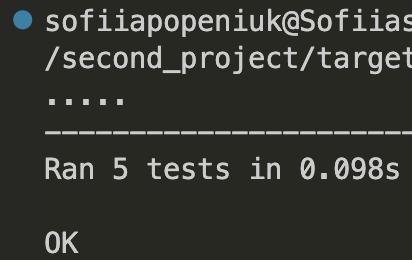

I correct it by myself. I add lower() to letters and words and deepcopy() to copy lower_letters list and now this function is working correctly. The results are 0.77/1

In [ ]:
from copy import deepcopy
def get_pure_user_words(user_words: list[str], letters: list[str],\
words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    >>> get_pure_user_words(['seva', 'seht', 'sera', 'sare', 'ltr', 'qrt', 'g', 'wwwww', 'rtgf', 'sxdl', 'sedl', 'tsal'], ['v', 'h', 't', 'd', 's', 'r', 'a', 'e', 'l'],\
get_words("/Users/sofiiapopeniuk/documents/op/eng.txt", ['v', 'h', 't', 'd', 's', 'r', 'a', 'e', 'l']))
    ['opto']
    """
    wrong_words = []
    letters_lower = ""
    for letter in letters:
        letters_lower += letter.lower()
    for word in user_words:
        word = word.strip().lower()
        checked = deepcopy(letters_lower)
        if (4 <= len(word) <= 9) and (letters[4] in word) and(word not in words_from_dict):
            is_possible_word = True
            for letter in word:
                if letter in checked:
                    checked = checked.replace(letter, "", 1)
                else:
                    is_possible_word = False
                    break
            if is_possible_word:
                wrong_words.append(word)
    return wrong_words

According to cms, I need to correct only get_pure_user_words function. I again paste condition("Для цього розробіть функцію get_pure_user_words(user_words, letters, words_from_dict), (де user_words - слова, які ввів користувач, letters це список літер ігрового поля, words_from_dict - слова зі словника, які відповідають правилам). Всередині функції нічого на екран не виводиться.

Прикладом результату виконання такої функції щодо ігрового поля вище могло би бути:

['opto']") and start code with asking of unittests.

In [ ]:
import unittest
from target_game import get_pure_user_words

class TestGetPureUserWords(unittest.TestCase):
    def test_get_pure_user_words_empty_input(self):
        # Test when user_words, letters, and words_from_dict are all empty
        user_words = []
        letters = []
        words_from_dict = []
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, [])

    def test_get_pure_user_words_no_wrong_words(self):
        # Test when all user words are in the dictionary
        user_words = ['opt', 'pop', 'pot']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pop', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, [])

    def test_get_pure_user_words_with_wrong_words(self):
        # Test when some user words are not in the dictionary
        user_words = ['opt', 'pop', 'pot', 'toop']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pop', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, ['toop'])

    def test_get_pure_user_words_all_wrong_words(self):
        # Test when all user words are not in the dictionary
        user_words = ['toop', 'pox', 'zoo']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pop', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, ['toop', 'pox', 'zoo'])

if __name__ == '__main__':
    unittest.main()


But all tests passed perfectly.

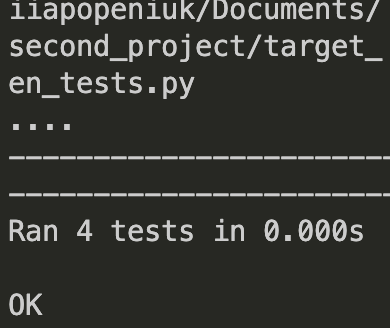

So I ask the next request "make some tests that will check if all leters are in letters and if length is appropriate".

In [ ]:
import unittest
from target_game import get_pure_user_words

class TestGetPureUserWords(unittest.TestCase):
    def test_get_pure_user_words_valid_input(self):
        # Test when all user words are valid and present in the dictionary
        user_words = ['opt', 'pop', 'pot']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pop', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, [])

    def test_get_pure_user_words_invalid_letter(self):
        # Test when user words contain letters not present in the provided letters list
        user_words = ['dog', 'cat', 'pot']
        letters = ['o', 'p', 't']
        words_from_dict = ['pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, ['dog', 'cat'])

    def test_get_pure_user_words_invalid_length(self):
        # Test when user words have lengths that are inappropriate
        user_words = ['opt', 'popeye', 'pot']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, ['popeye'])

    def test_get_pure_user_words_mixed_invalid_conditions(self):
        # Test when user words have a mix of invalid letters and inappropriate lengths
        user_words = ['opt', 'popeye', 'dog']
        letters = ['o', 'p', 't']
        words_from_dict = ['opt', 'pot']
        result = get_pure_user_words(user_words, letters, words_from_dict)
        self.assertEqual(result, ['popeye', 'dog'])

if __name__ == '__main__':
    unittest.main()


But it also passed every test.

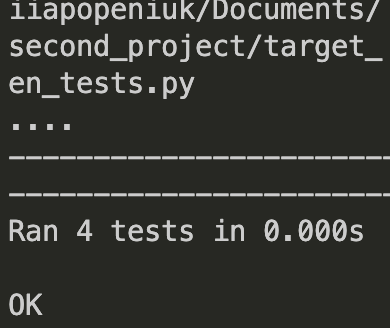

I again correct by myself. I just added check that I described in the last request above.

In [ ]:
def get_pure_user_words(user_words: list[str], letters: list[str],\
words_from_dict: list[str]) -> list[str]:
    """
    Checks user words with the rules and returns list of those words
    that are not in dictionary.
    >>> get_pure_user_words(['seva', 'seht', 'sera', 'sare', 'ltr', 'qrt', 'g', 'wwwww', 'rtgf', 'sxdl', 'sedl', 'tsal'], ['v', 'h', 't', 'd', 's', 'r', 'a', 'e', 'l'],\
get_words("/Users/sofiiapopeniuk/documents/op/eng.txt", ['v', 'h', 't', 'd', 's', 'r', 'a', 'e', 'l']))
    ['opto']
    """
    wrong_words = []
    letters_lower = ""
    for letter in letters:
        letters_lower += letter.lower()
    for word in user_words:
        word = word.strip().lower()
        checked = deepcopy(letters_lower)
        if (4 <= len(word) <= 9) and (letters[4] in word) and(word not in words_from_dict):
            is_possible_word = True
            for letter in word:
                if letter in checked:
                    checked = checked.replace(letter, "", 1)
                else:
                    is_possible_word = False
                    break
            if is_possible_word:
                wrong_words.append(word)
    return wrong_words

Now it passed all tests on cms.

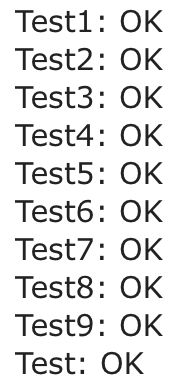